In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [4]:
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
0    150 non-null float64
1    150 non-null float64
2    150 non-null float64
3    150 non-null float64
4    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [5]:
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100, 4].values

In [8]:
df.shape

(150, 5)

In [9]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [11]:
X = df.iloc[0:100, [0, 2]].values

In [12]:
X.shape

(100, 2)

In [40]:
plt.scatter(X[0:500, 0], X[0:500, 1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue',marker='x',label = 'versicolor')

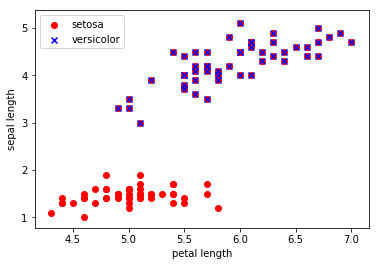

In [41]:
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [61]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [62]:
X = iris.data[:, [2,3]]

In [69]:
y = iris.target

In [72]:
np.unique(y)

array([0, 1, 2])

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [75]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [95]:
sc.mean_

array([ 3.82857143,  1.22666667])

In [98]:
sc.scale_

array([ 1.79595918,  0.77769705])

In [117]:
X_train_std[0:100,0].std()


0.98963798712756768

In [131]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1,random_state = 0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [132]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [133]:
from sklearn.metrics import accuracy_score
print('Accuracy %f.2' % accuracy_score(y_test,y_pred))

Accuracy 0.911111.2
